<a href="https://colab.research.google.com/github/moaaz12-web/Data-Science-topics/blob/main/DS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORTING LIBRARIES AND READING DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv("/content/daily_cp_activity_dataset.csv")


# 2. INITIAL ANALYSIS

In [ ]:
# First we check the shape of the dataframe using the .shape method of Pandas
data.shape

(761, 5)

In [ ]:
# We then check the statistical information on the dataframe using the .describe method of Pandas
data.describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,761.000000,731.000000,761.000000,756.000000
mean,72.417871,17.532585,0.653193,0.914735
std,96.039679,10.007564,0.171553,1.749988
min,34.000000,-9.980000,0.430000,0.000000
25%,58.000000,10.930000,0.520000,0.000000
50%,66.000000,18.630000,0.590000,0.000000
75%,72.000000,24.410000,0.790000,0.910000
max,1506.000000,37.950000,1.000000,12.900000


In [ ]:
# Let's check a few rows of the dataframe
data.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.0
1,2021-05-02,927,19.88,0.55,0.0
2,2021-05-03,40,16.88,0.60,0.0
3,2021-05-04,51,21.88,0.53,0.0
4,2021-05-05,50,21.11,0.54,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658 entries, 2021-05-01 to 2023-05-31
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   courier_partners_online  658 non-null    float64
 1   temperature              658 non-null    float64
 2   relative_humidity        658 non-null    float64
 3   precipitation            658 non-null    float64
dtypes: float64(4)
memory usage: 25.7 KB


# 3. CONVERT INDEX TO DATATIME DATATYPE

We will convert the index of the dataset to DateTime format now

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [ ]:
data.head()

,courier_partners_online,temperature,relative_humidity,precipitation
date,,,,
2021-05-01,49,18.27,0.57,0.0
2021-05-02,927,19.88,0.55,0.0
2021-05-03,40,16.88,0.60,0.0
2021-05-04,51,21.88,0.53,0.0
2021-05-05,50,21.11,0.54,0.0


# 4. EXPLORATORY DATA ANALYSIS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 761 entries, 2021-05-01 to 2023-05-31
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   courier_partners_online  761 non-null    int64  
 1   temperature              731 non-null    float64
 2   relative_humidity        761 non-null    float64
 3   precipitation            756 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 29.7 KB


### 1. Online courier partners overtime

From below graph, we can see the online courier partners overtime. There have been some spikes in online couriers for some days, and more investigation would be needed to figure out why so many couriers were online during these particular days.

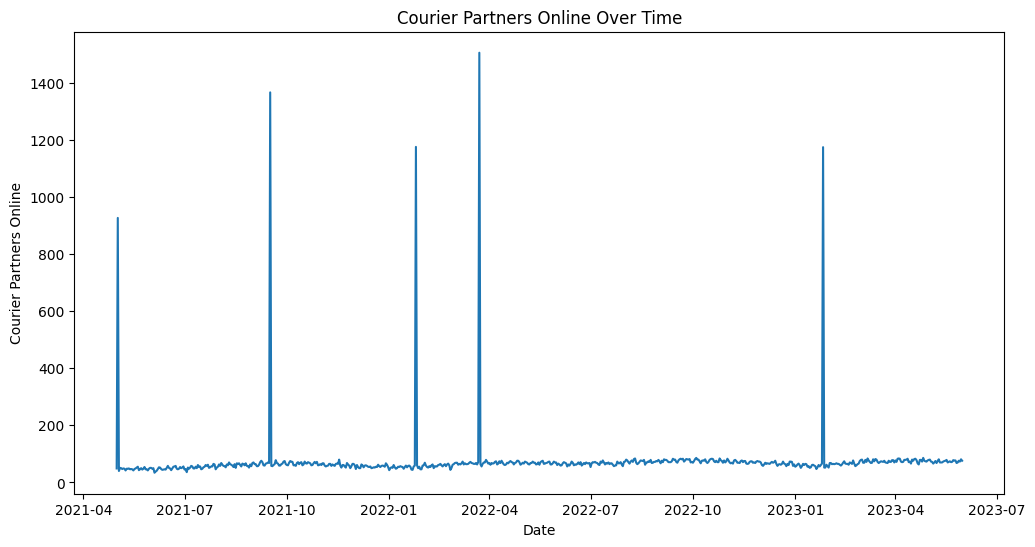

In [ ]:
# Line plot of 'courier_partners_online' over time
plt.figure(figsize=(12, 6))
plt.plot(data['courier_partners_online'])
plt.title('Courier Partners Online Over Time')
plt.xlabel('Date')
plt.ylabel('Courier Partners Online')
plt.show()

### 2. Distribution of numerical features

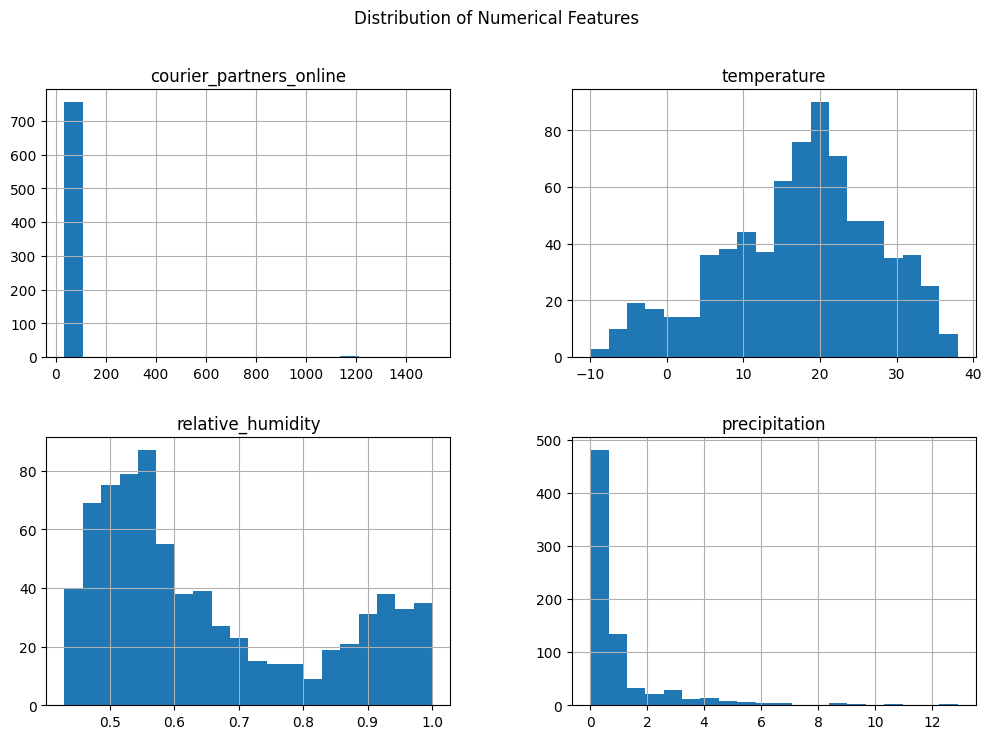

In [ ]:
# Distribution of numerical features
data.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

From above, we can see that the temperature column is normally distributed. As for the precipitation column, it is highly left skewed and might impact the modeling stage later on. Moreover, relative_humidity is also a bit left skewed, but it also follow normal distribution to some extent.

### 3. Temperature overtime

The graph below shows the temperature over the time period of the dataframe. We can see that the temperature stayed between around 38 degrees to -8 degrees.

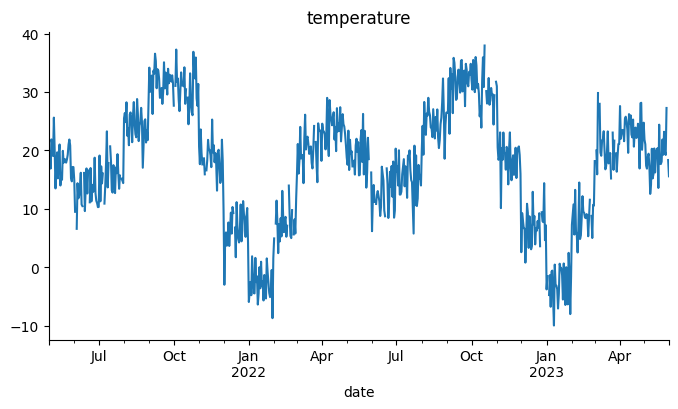

In [ ]:
from matplotlib import pyplot as plt
data['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(f"Max temperature is {data['temperature'].max()}, and min temperature is {data['temperature'].min()}")

Max temperature is 37.95, and min temperature is -9.98


### 4. Relation between relative humidity and precipitation

Let's now view a scatterplot between relative humidity and precipitation. We can see that there is no such correlation between these columns, only a slight postive corrleation exists.

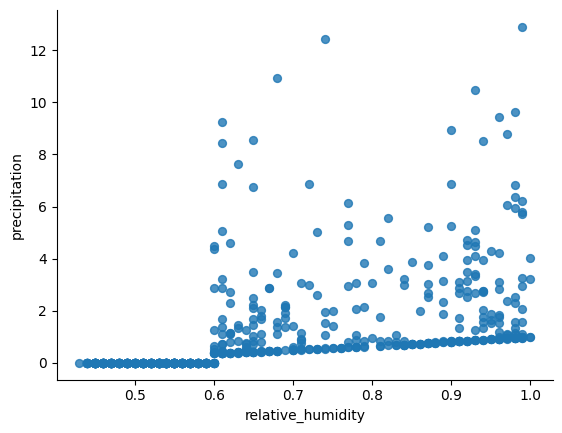

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='relative_humidity', y='precipitation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### 5. Relation between temperature and relative humidity

The graph below shows a scatter plot between the temperature and relative humidity. We can see that there is a sharp negative correlation between these two features.If temperature increases, then relative humidity declines sharply.

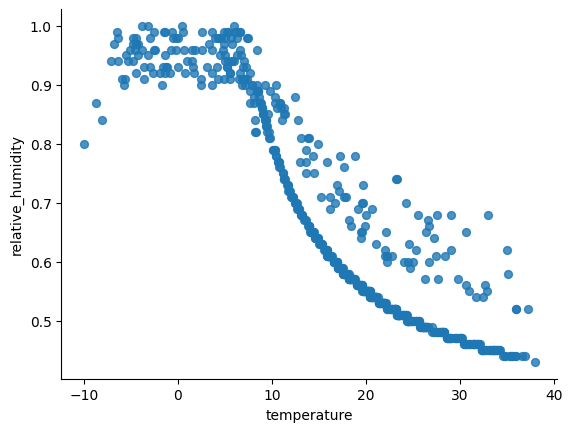

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='temperature', y='relative_humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### 6. Correlation matrix between all features

Now we will draw a correlation matrx between all features and visualize how much and how less is the correlation between columns

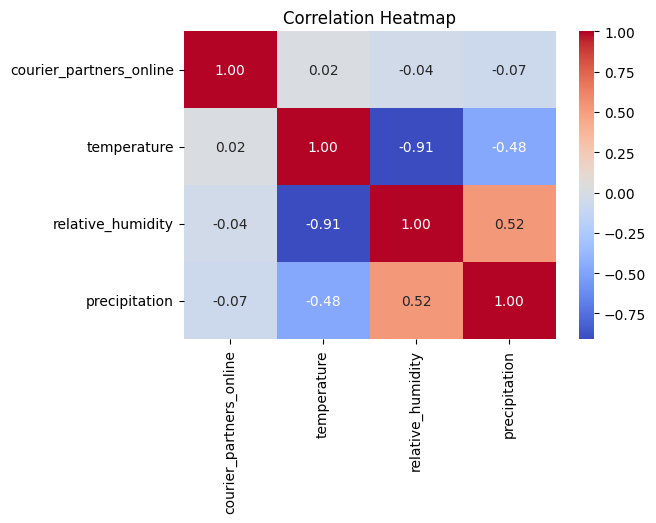

In [ ]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. MISSING VALUE TREATMENT

The cell below shows that there are some missing values in the dataset

In [ ]:
data.isnull().sum()

courier_partners_online     0
temperature                30
relative_humidity           0
precipitation               5
dtype: int64

We wil treat missing values using KNN imputer. K-Nearest Neighbors (KNN) imputation is a machine learning technique used for filling missing values in a dataset. It identifies the k-nearest neighbors for each data point with missing values and imputes those values based on the similarity with its neighbors. This method is effective when missing values are random and when there is a meaningful concept of similarity between data points. The scikit-learn library provides a KNNImputer for implementing this technique. Adjusting the n_neighbors parameter controls the number of neighbors considered during the imputation process.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


# Instantiate KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed_array = knn_imputer.fit_transform(data)

# Convert the imputed array back to DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=data.columns, index=data.index)

# Replace the original DataFrame with the imputed DataFrame
data.update(df_imputed)

# Check for missing vales
data.isnull().sum()


courier_partners_online    0
temperature                0
relative_humidity          0
precipitation              0
dtype: int64

All missing values have been imputed using KNN imputer.







# 6. OUTLIER DETECTION

The code below uses the INTERQUARTILE RANGE (IQR) method to count the number of outliers in the dataframe for each column and then print their counts

In [ ]:
import pandas as pd

# Function to detect outliers using IQR and return the count
def count_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((df < (Q1 - factor * IQR)) | (df > (Q3 + factor * IQR))).sum()
    return outliers_count

# Count outliers in each column
outliers_count_per_column = count_outliers_iqr(data)

# Display the count of outliers for each column
print("Count of Outliers in Each Column:")
print(outliers_count_per_column)


Count of Outliers in Each Column:
courier_partners_online     7
temperature                 1
relative_humidity           0
precipitation              97
dtype: int64


We can see that there are some outliers, we will remove them now using the IQR method

The code below defines a function, remove_outliers_iqr, to remove outliers from a DataFrame based on the Interquartile Range (IQR) method. The function takes a DataFrame and an optional factor as parameters, where the factor controls the range of values considered outliers. It calculates the IQR for each column, identifies and removes rows with values outside the defined range for any column. The code then demonstrates the function by removing outliers from the original DataFrame and displays both the original and modified DataFrames. This approach is useful for handling outliers and ensuring data robustness.









In [ ]:
import pandas as pd

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - factor * IQR)) | (df > (Q3 + factor * IQR))).any(axis=1)]

# Removing outliers from each column
data = remove_outliers_iqr(data)



# 7. FEATURE ENGINEERING

Now we will do feature engineering. We will create 3 features; namely temperature deviation, rolling mean temperature, and rolling mean courier.

1. Temperature Deviation from the Mean:

Justification: This feature calculates the deviation of daily temperatures from the mean temperature. It provides information about how each day's temperature compares to the average temperature over the dataset's time span. This can capture unusual temperature patterns or deviations that might impact the courier service, for example, during extreme weather conditions.

2. Rolling Mean of Temperature (7-day rolling mean):

Justification: The rolling mean of temperature is used to smooth out short-term fluctuations in temperature and highlight long-term trends. A 7-day rolling mean is chosen, which can reveal weekly patterns in temperature variations. This feature helps capture the overall temperature trend over time and reduces the impact of daily fluctuations.

3. Rolling Mean of Courier Partners Online (7-day rolling mean):

Justification: Similar to the rolling mean of temperature, the rolling mean of courier partners online is calculated to smooth out short-term fluctuations. A 7-day rolling mean is used to highlight weekly patterns in courier partner availability. This feature helps identify trends in courier partner availability over time, making it easier to discern patterns and changes in service capacity.

In [ ]:
import pandas as pd

# Additional Feature 1: Temperature Deviation from the Mean
average_temperature = data['temperature'].mean()
data['temperature_deviation'] = data['temperature'] - average_temperature

# Additional Feature 2: Rolling Mean of Temperature (e.g., 7-day rolling mean)
data['rolling_mean_temperature'] = data['temperature'].rolling(window=7).mean()

# Additional Feature 3: Rolling Mean of Courier Partners Online (e.g., 7-day rolling mean)
data['rolling_mean_courier'] = data['courier_partners_online'].rolling(window=7).mean()

# Fill NaN values in the rolling mean columns with the mean
data['rolling_mean_temperature'].fillna(data['rolling_mean_temperature'].mean(), inplace=True)
data['rolling_mean_courier'].fillna(data['rolling_mean_courier'].mean(), inplace=True)

<ipython-input-153-3aff80cae633>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temperature_deviation'] = data['temperature'] - average_temperature
<ipython-input-153-3aff80cae633>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean_temperature'] = data['temperature'].rolling(window=7).mean()
<ipython-input-153-3aff80cae633>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Here is our dataframe with additional features.

In [ ]:
data.head()

,courier_partners_online,temperature,relative_humidity,precipitation,temperature_deviation,rolling_mean_temperature,rolling_mean_courier
date,,,,,,,
2021-05-01,49.0,18.27,0.57,0.0,-0.698599,18.971478,66.020596
2021-05-03,40.0,16.88,0.60,0.0,-2.088599,18.971478,66.020596
2021-05-04,51.0,21.88,0.53,0.0,2.911401,18.971478,66.020596
2021-05-05,50.0,21.11,0.54,0.0,2.141401,18.971478,66.020596
2021-05-06,47.0,19.04,0.56,0.0,0.071401,18.971478,66.020596


# 8. MODELING

In this section, we will create 3 different ML models, Linear Regression, Random Forests, and Gradient Boosting to predict the number of couriers online for the future. We will print the model RMSE values, and the actual testing values and the model predicted values.

**JUSTIFICATION**

Linear Regression: Linear Regression is a simple and interpretable model that assumes a linear relationship between features and the target variable. It's used as a baseline model and provides insights into the direct impact of features on the target.

Random Forest: Random Forest is an ensemble model that is robust, handles non-linear relationships well, and is less prone to overfitting. It aggregates predictions from multiple decision trees, providing better accuracy and generalization.

Gradient Boosting: Gradient Boosting builds decision trees sequentially, with each tree correcting the errors of the previous one. It is a powerful model for capturing complex relationships, handling non-linearity, and improving predictive accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

First we resample data to daily frequency and create a few additional features, namely day of week, day of month, and the month number

In [ ]:
df = data

# Resample to daily frequency
df_daily = df.resample('D').sum()

# Feature engineering
df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['day_of_month'] = df_daily.index.day
df_daily['month'] = df_daily.index.month

We then split the data into training and testing. We are keeping the first 80 percent of data for training and the remaining 20 percent for testing.

In [ ]:
# Train-test split
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Features and target variable
X_train, y_train = train[['day_of_week', 'day_of_month', 'month']], train['courier_partners_online']
X_test, y_test = test[['day_of_week', 'day_of_month', 'month']], test['courier_partners_online']


In code below, we are creating additional features for future predictions. We generate a sequence of future dates spanning 100 days and create corresponding features such as 'day_of_week,' 'day_of_month,' and 'month' based on those dates. These features will be used to make predictions using the ML models for the next 100 days.








In [ ]:

# Additional Features for Future Predictions
future_days = 100
future_dates = pd.date_range(start=df_daily.index[-1], periods=future_days + 1, freq='D')[1:]
future_features = pd.DataFrame(index=future_dates)
future_features['day_of_week'] = future_features.index.dayofweek
future_features['day_of_month'] = future_features.index.day
future_features['month'] = future_features.index.month


In this code section, we perform the following tasks:

1. Linear Regression Model: We instantiate a Linear Regression model, fit it on the training data (X_train, y_train), make predictions on the test set (X_test), and calculate the root mean squared error (RMSE) for evaluation.

2. Random Forest Model: We create a Random Forest Regressor with 100 trees and a fixed random state, train it on the training data, predict on the test set, and compute the RMSE.

3. Gradient Boosting Model: We initialize a Gradient Boosting Regressor with 100 trees and a fixed random state, train it on the training set, predict on the test set, and calculate the RMSE.

4. Evaluation Printing: The code then prints the RMSE values for each model, providing insights into their performance on the test data.

In [ ]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))

# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))

# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_predictions))

# Evaluate models
print(f'RMSE (Linear Regression): {linear_reg_rmse}')
print(f'RMSE (Random Forest): {random_forest_rmse}')
print(f'RMSE (Gradient Boosting): {gradient_boosting_rmse}')


RMSE (Linear Regression): 28.71121991031762
RMSE (Random Forest): 26.534370065468707
RMSE (Gradient Boosting): 25.288660994972776


In the code below, we are plotting the actual testing predictions and the model predicted testing predictions for all three models.

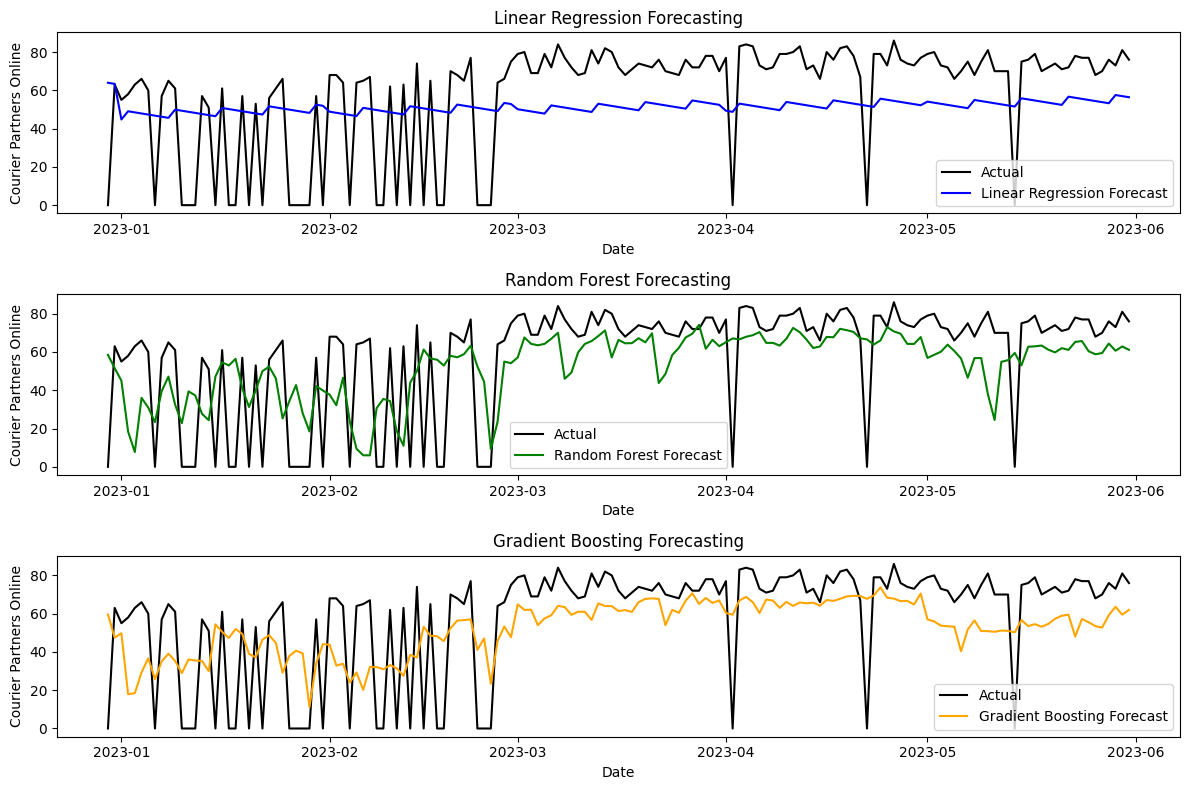

In [ ]:

# Plot results
plt.figure(figsize=(12, 8))

# Linear Regression
plt.subplot(3, 1, 1)
plt.plot(test.index, y_test, label='Actual', color='black')
plt.plot(test.index, linear_reg_predictions, label='Linear Regression Forecast', color='blue')
plt.legend()
plt.title('Linear Regression Forecasting')
plt.xlabel('Date')
plt.ylabel('Courier Partners Online')

# Random Forest
plt.subplot(3, 1, 2)
plt.plot(test.index, y_test, label='Actual', color='black')
plt.plot(test.index, random_forest_predictions, label='Random Forest Forecast', color='green')
plt.legend()
plt.title('Random Forest Forecasting')
plt.xlabel('Date')
plt.ylabel('Courier Partners Online')

# Gradient Boosting
plt.subplot(3, 1, 3)
plt.plot(test.index, y_test, label='Actual', color='black')
plt.plot(test.index, gradient_boosting_predictions, label='Gradient Boosting Forecast', color='orange')
plt.legend()
plt.title('Gradient Boosting Forecasting')
plt.xlabel('Date')
plt.ylabel('Courier Partners Online')

plt.tight_layout()
plt.show()


Lastly, we make predictions for the future.

This part of the code is making predictions for the next 100 days using the trained models (Linear Regression, Random Forest, and Gradient Boosting). It uses the additional features for future dates, which include the day of the week, day of the month, and the month. The predictions for each model are stored in the variables:

1. linear_reg_future_predictions: Predictions made by the Linear Regression model.
2. random_forest_future_predictions: Predictions made by the Random Forest model.
3. gradient_boosting_future_predictions: Predictions made by the Gradient Boosting model.

These predictions can be used for understanding the expected values of the "courier_partners_online" variable in the future.

In [ ]:

# Make predictions for the next 100 days with additional features
linear_reg_future_predictions = linear_reg_model.predict(future_features[['day_of_week', 'day_of_month', 'month']])
random_forest_future_predictions = random_forest_model.predict(future_features[['day_of_week', 'day_of_month', 'month']])
gradient_boosting_future_predictions = gradient_boosting_model.predict(future_features[['day_of_week', 'day_of_month', 'month']])


Let's plot the predicted values

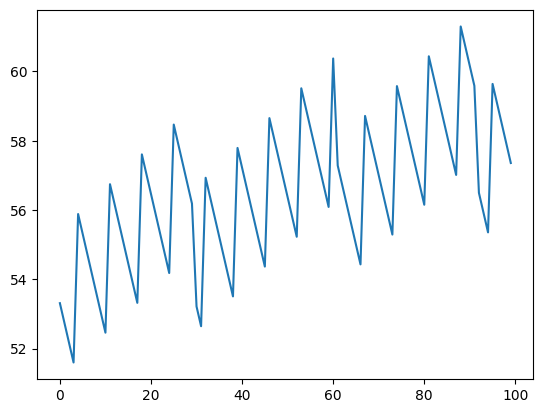

In [ ]:
plt.plot(linear_reg_future_predictions);

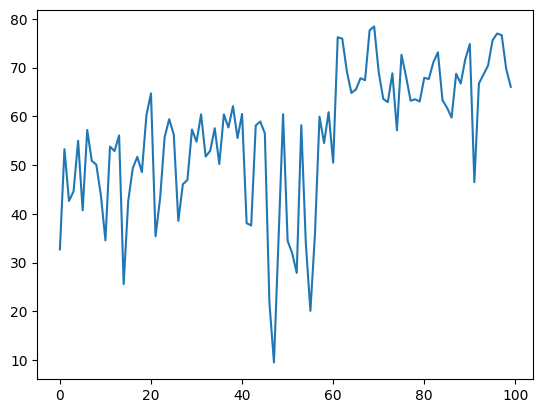

In [ ]:
plt.plot(random_forest_future_predictions);

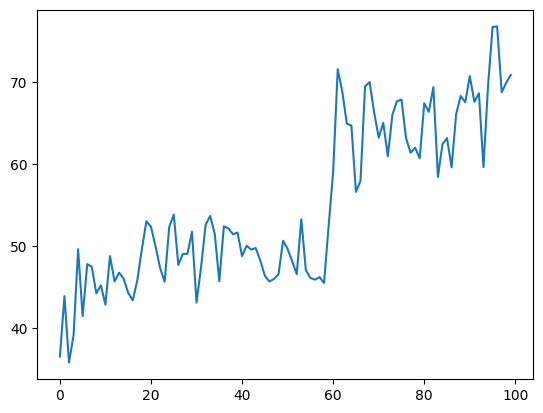

In [ ]:
plt.plot(gradient_boosting_future_predictions);

# A DIFFERENT APPROACH


In this code, a Stacking Regressor to predict the future values of the 'courier_partners_online' variable. The dataset, initially not in daily frequency, is resampled to daily frequency for better modeling. Feature engineering is performed by extracting day of the week, day of the month, and month from the timestamp. The data is split into training and testing sets, and the features ('day_of_week', 'day_of_month', 'month') are used to train a Stacking Regressor, combining the predictions of Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. The model is evaluated using Root Mean Square Error (RMSE) on the test set, and the results are visualized through a plot comparing the actual values with the Stacking Regressor's predictions. Finally, the model is used to make future predictions for the next 100 days based on additional features, providing a forecast for the 'courier_partners_online' variable. The Stacking Regressor aims to leverage the strengths of multiple regression algorithms to improve overall prediction performance.

RMSE (Stacking Regressor): 27.513569380726526


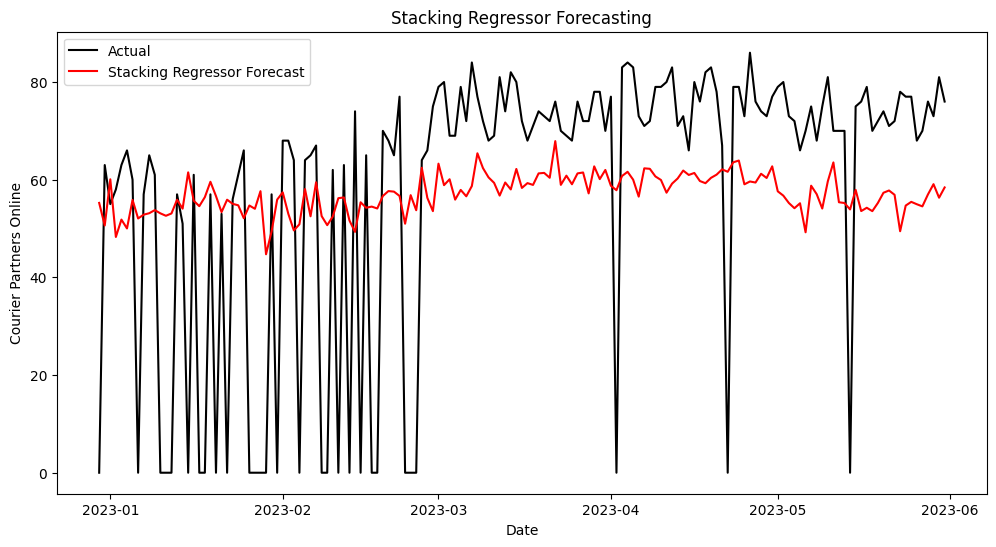

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'data' is defined and contains the DataFrame
df = data

# Resample to daily frequency
df_daily = df.resample('D').sum()

# Feature engineering
df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['day_of_month'] = df_daily.index.day
df_daily['month'] = df_daily.index.month

# Train-test split
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Features and target variable
X_train, y_train = train[['day_of_week', 'day_of_month', 'month']], train['courier_partners_online']
X_test, y_test = test[['day_of_week', 'day_of_month', 'month']], test['courier_partners_online']

# Stacking Regressor
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions))

# Evaluate the Stacking Regressor
print(f'RMSE (Stacking Regressor): {stacking_rmse}')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='black')
plt.plot(test.index, stacking_predictions, label='Stacking Regressor Forecast', color='red')
plt.legend()
plt.title('Stacking Regressor Forecasting')
plt.xlabel('Date')
plt.ylabel('Courier Partners Online')
plt.show()

# Make predictions for the next 100 days with additional features
future_days = 100
future_dates = pd.date_range(start=df_daily.index[-1], periods=future_days + 1, freq='D')[1:]
future_features = pd.DataFrame(index=future_dates)
future_features['day_of_week'] = future_features.index.dayofweek
future_features['day_of_month'] = future_features.index.day
future_features['month'] = future_features.index.month

stacking_future_predictions = stacking_model.predict(future_features[['day_of_week', 'day_of_month', 'month']])

